### Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

### Methods

In [3]:
def transform_column(value):
    if isinstance(value, str):
        if 'one' in value.lower() or 'first' in value.lower() or '1' in value:
            return 1
        elif 'two' in value.lower() or 'second' in value.lower() or '2' in value:
            return 2
        elif 'three' in value.lower() or 'third' in value.lower() or '3' in value or '3.00' in value:
            return 3
        elif 'four' in value.lower() or 'fourth' in value.lower() or '4' in value:
            return 4
        elif 'five' in value.lower() or 'fifth' in value.lower() or '5' in value:
            return 5
        else:
            return value
    else:
        return value

### Import Data and Data Overview

In [4]:
path = "..\\Datasets\\train.csv.zip"
data = pd.read_csv(path,compression="zip", index_col = "Unnamed: 0")
TARGET = 'damage_grade'
data.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19804\2100767160.py:2: DtypeWarning: Columns (1,3,5,6,7,8,9,10,11,12,13,16,17,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path,compression="zip", index_col = "Unnamed: 0")


,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,floor two,1.0,256 ft^2,22.0,Flat,Bamboo or Timber,Bamboo/Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,0.0,0.0,1.0
1,Floor 3,3.0,985 ft^2,18.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
2,Two Floor,7.0,NaN,14.0,Flat,Mud mortar-Stone/Brick,NaN,Clay,Wood-Mud or Bamboo Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
3,two,18.0,185 ft^2,15.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4.0
4,just 2 floor,22.0,290 ft^2,17.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Bamboo or Timber Light roof,Clay,Timber Mud or Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,1.0


In [5]:
data.shape

(722815, 24)

In [6]:
data.isna().sum()

floors_before_eq (total)          332806
old_building                      239204
plinth_area (ft^2)                421208
height_before_eq (ft)             332806
land_surface_condition            301606
type_of_foundation                239204
type_of_roof                      421208
type_of_ground_floor              332806
type_of_other_floor               301606
position                          312006
building_plan_configuration       301606
technical_solution_proposed       676014
legal_ownership_status            124802
has_secondary_use                 197604
type_of_reinforcement_concrete    291206
residential_type                  270404
no_family_residing                145602
public_place_type                      0
industrial_use_type               114402
govermental_use_type              249604
flexible_superstructure            62400
wall_binding                       62400
wall_material                     228804
damage_grade                           0
dtype: int64

In [7]:
data.duplicated().sum()

335076

In [8]:
data.info() # info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722815 entries, 0 to 37198
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   floors_before_eq (total)        390009 non-null  object 
 1   old_building                    483611 non-null  float64
 2   plinth_area (ft^2)              301607 non-null  object 
 3   height_before_eq (ft)           390009 non-null  float64
 4   land_surface_condition          421209 non-null  object 
 5   type_of_foundation              483611 non-null  object 
 6   type_of_roof                    301607 non-null  object 
 7   type_of_ground_floor            390009 non-null  object 
 8   type_of_other_floor             421209 non-null  object 
 9   position                        410809 non-null  object 
 10  building_plan_configuration     421209 non-null  object 
 11  technical_solution_proposed     46801 non-null   object 
 12  legal_ownership_s

In [9]:
data.describe() # numerical description

,old_building,height_before_eq (ft),has_secondary_use,type_of_reinforcement_concrete,wall_binding,wall_material,damage_grade
count,483611.000000,390009.000000,525211.000000,431609.000000,660415.000000,494011.000000,722815.000000
mean,24.342800,16.047158,0.121279,0.072369,4.266729,1.738795,3.643872
std,64.963571,5.527362,0.326451,0.318483,1.667539,0.646120,1.342427
min,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,9.000000,12.000000,0.000000,0.000000,5.000000,2.000000,3.000000
50%,16.000000,16.000000,0.000000,0.000000,5.000000,2.000000,4.000000
75%,27.000000,18.000000,0.000000,0.000000,5.000000,2.000000,5.000000
max,999.000000,99.000000,1.000000,3.000000,7.000000,3.000000,5.000000


In [10]:
data.describe(include="object")

,floors_before_eq (total),plinth_area (ft^2),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,building_plan_configuration,technical_solution_proposed,legal_ownership_status,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure
count,390009,301607,421209,483611,301607,390009,421209,410809,421209,46801,598013,452411,577213,722815,608413,473211,660415
unique,47,930,3,12,12,15,11,4,10,4,13,6,11,13,9,3,2
top,Floor two,300 ft^2,Flat,Clay Sand Mixed mortar-Stone/Brick,Bamboo/Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,Rectangular,Reconstruction,Private,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable
freq,22000,10937,349097,199916,79640,262305,223114,325721,404366,28847,315103,430854,487302,721495,564106,473073,607527


### Basic Visualizations

d:\Programs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='land_surface_condition', ylabel='count'>

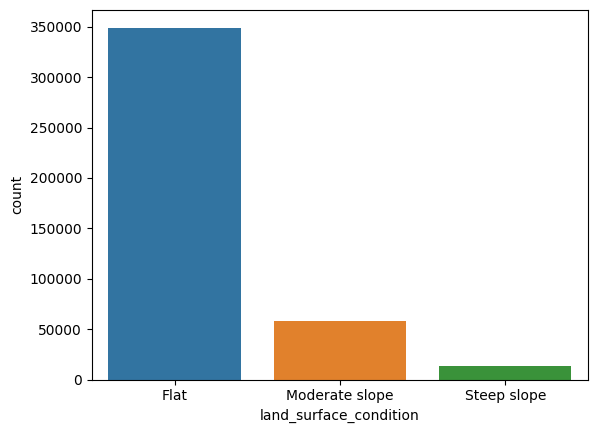

In [11]:
sns.countplot(data['land_surface_condition'])

d:\Programs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='damage_grade', ylabel='count'>

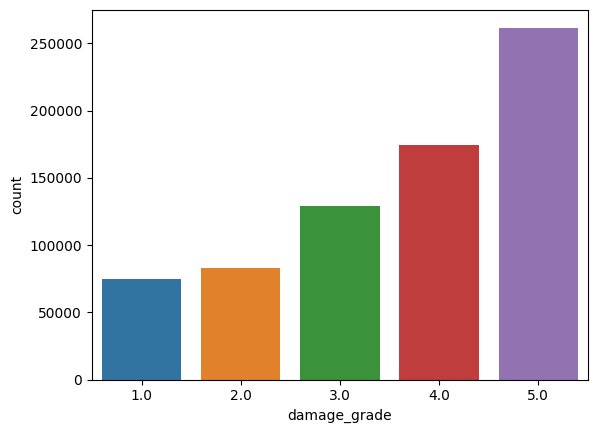

In [12]:
sns.countplot(data['damage_grade'])

### Preprocessing

In [13]:
data2 = data.dropna(axis=0).reset_index(drop=True)

In [14]:
data2.shape

(46801, 24)

### Method 1 : Dropping all NaN values

In [15]:
data2['floors_before_eq (total)'] = data2['floors_before_eq (total)'].apply(lambda x: transform_column(x))
data2['floors_before_eq (total)'] = pd.to_numeric(data2['floors_before_eq (total)'])

data2['plinth_area (ft^2)'] = data2['plinth_area (ft^2)'].apply(lambda x : x.split(" ")[0] if x != "More than 1000 ft^2" else x.split(" ")[-2])
data2['plinth_area (ft^2)'] = pd.to_numeric(data2['plinth_area (ft^2)'])

data2 = data2.drop('no_family_residing', axis=1)

In [16]:
# num_concrete = ['has_secondary_use', 'type_of_reinforcement_concrete', 'wall_binding', 'wall_material']
data_num = data2.select_dtypes(include='number')
data_cat = data2.select_dtypes('object')
encoder = OneHotEncoder(drop='first')
concat = pd.concat([data_num, pd.DataFrame(encoder.fit_transform(data_cat).toarray(), columns=encoder.get_feature_names(data_cat.columns))], axis=1)
concat


d:\Programs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),has_secondary_use,type_of_reinforcement_concrete,wall_binding,wall_material,damage_grade,land_surface_condition_Moderate slope,...,industrial_use_type_Food,industrial_use_type_Forest-based,industrial_use_type_Infrastructure,industrial_use_type_Manufacturing,industrial_use_type_Metallurgy,industrial_use_type_Non-industrial,industrial_use_type_Service/Tourism,govermental_use_type_Non-govermental,govermental_use_type_Police Offices,flexible_superstructure_unavailable
0,1,22.0,300,10.0,0.0,0.0,5.0,2.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,3,22.0,360,18.0,0.0,0.0,5.0,2.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,2,8.0,380,17.0,0.0,0.0,5.0,2.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,2,22.0,250,14.0,0.0,0.0,5.0,2.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,2,7.0,312,13.0,0.0,0.0,5.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46796,2,8.0,547,17.0,0.0,0.0,5.0,2.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
46797,1,24.0,234,10.0,0.0,0.0,5.0,2.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
46798,2,10.0,415,16.0,0.0,0.0,5.0,2.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
46799,3,85.0,410,22.0,0.0,0.0,5.0,2.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [17]:
X = concat.drop(TARGET, axis=1)
y = concat[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [20]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(x_test)

In [ ]:
svm_score = f1_score(y_test, y_pred, average='macro')
svm_score

In [105]:
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

RandomForestClassifier()

In [106]:
# result = model.predict(X_test)

In [107]:
# score = f1_score(y_test, result, average='macro')
# score

0.6659841734643823

### Capping the outliers

In [42]:
data2[data2['old_building'] < 800].max()

floors_before_eq (total)                                  two story
old_building                                                  200.0
plinth_area (ft^2)                              More than 1000 ft^2
height_before_eq (ft)                                          99.0
land_surface_condition                                  Steep slope
type_of_foundation                              Reinforced Concrete
type_of_roof                      reinforced cement concrete/rb/rbc
type_of_ground_floor                        soil, water, loam Mixed
type_of_other_floor               reinforced cement concrete/rb/rbc
position                                               Not attached
building_plan_configuration                                 U-shape
technical_solution_proposed                          Reconstruction
legal_ownership_status                                  Unspecified
has_secondary_use                                               1.0
type_of_reinforcement_concrete                  

### Test Data

In [108]:
test_path = "..\\Datasets\\test.csv.zip"
test = pd.read_csv(test_path,compression="zip", index_col='id')
test.head()

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,has_secondary_use,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material
id,,,,,,,,,,,,,,,,,,,,,
0,2,7,418 ft^2,14,Flat,Clay mortar-Stone/Brick,Bamboo/TImber-Light Roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5,2
1,3.00,13,396 ft^2,21,Flat,Clay mortar-Stone/Brick,Bamboo/TImber-Heavy Roof,Brick or Stone,TImber/Bamboo-Mud,Not attached,...,0.0,0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5,2
2,Floor-three,40,400 ft^2,18,Flat,Clay mortar-Stone/Brick,Bamboo/Timber Light roof,Clay,Wood or Bamboo Mud,Not attached,...,0.0,0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5,2
3,floor second,25,378 ft^2,20,Flat,Bamboo or Timber,Bamboo/Timber Heavy roof,mud,TImber/Bamboo-Mud,Attached-2 side,...,0.0,0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5,2
4,just 2 floor,5,375 ft^2,20,Flat,Mud mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Clay,Wood-Mud or Bamboo Mud,Attached-1 side,...,0.0,0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5,2


In [109]:
test2 = test.dropna(axis=0).reset_index(drop=True)

In [110]:
test2['floors_before_eq (total)'] = test2['floors_before_eq (total)'].apply(lambda x: transform_column(x))
test2['floors_before_eq (total)'] = pd.to_numeric(test2['floors_before_eq (total)'])

test2['plinth_area (ft^2)'] = test2['plinth_area (ft^2)'].apply(lambda x : x.split(" ")[0] if x != "More than 1000 ft^2" else x.split(" ")[-2])
test2['plinth_area (ft^2)'] = pd.to_numeric(test2['plinth_area (ft^2)'])

test3 = test2.drop('no_family_residing', axis=1)

In [111]:
# num_concrete = ['has_secondary_use', 'type_of_reinforcement_concrete', 'wall_binding', 'wall_material']
test_num = test3.select_dtypes(include='number')
test_cat = test3.select_dtypes('object')
test_encoder = OneHotEncoder(drop='first')
test_concat = pd.concat([test_num, pd.DataFrame(test_encoder.fit_transform(test_cat).toarray(), columns=test_encoder.get_feature_names(test_cat.columns))], axis=1)
test_concat

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),has_secondary_use,type_of_reinforcement_concrete,wall_binding,wall_material,land_surface_condition_Moderate slope,land_surface_condition_Steep slope,...,industrial_use_type_Food,industrial_use_type_Forest-based,industrial_use_type_Infrastructure,industrial_use_type_Manufacturing,industrial_use_type_Metallurgy,industrial_use_type_Non-industrial,industrial_use_type_Service/Tourism,govermental_use_type_Non-govermental,govermental_use_type_Police Offices,flexible_superstructure_unavailable
0,2,7,418,14,0.0,0,5,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,3,13,396,21,0.0,0,5,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,3,40,400,18,0.0,0,5,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,2,25,378,20,0.0,0,5,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,2,5,375,20,0.0,0,5,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242077,2,15,240,15,0.0,0,5,2,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
242078,3,4,174,18,0.0,0,5,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
242079,2,14,375,14,0.0,0,5,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
242080,2,9,486,16,0.0,0,5,2,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [116]:
test_concat_new = test_concat.drop('type_of_ground_floor_Timber', axis=1)

In [117]:
test_result = model.predict(test_concat_new)

In [146]:
final_result = pd.DataFrame(test_result)

In [147]:
final_result = final_result.rename(columns={0 : 'damage_grade'})
final_result.insert(0, 'id', final_result.index)
final_result = final_result.set_index('id')
final_result['damage_grade'] = final_result['damage_grade'].astype('int')

In [149]:
# final_result.to_csv('result.csv')